**Nome:** Carolene Reis Silva Bertoldi

**Número USP:** 12435619

# SIN5014 - Exercício 2

**1 - Construa um programa para implementar e mostrar o histograma de uma
imagem qualquer. 
O algoritmo deve receber como parâmetro uma matriz que
armazena o conjunto de pixels da imagem. Não podem ser usados
métodos/funções prontos de bibliotecas para construir o vetor do histograma,
mas podem ser usados métodos prontos para exibir ("plotar") o gráfico resultante.** 

In [12]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import io

Função para gerar histograma:

In [16]:
def histogram(image):
  my_histogram = [0] * 256
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      idx = image[i][j]
      my_histogram[idx] = my_histogram[idx] + 1

  my_edges = range(len(my_histogram))
  return my_histogram, my_edges

Imagem em grayscale:

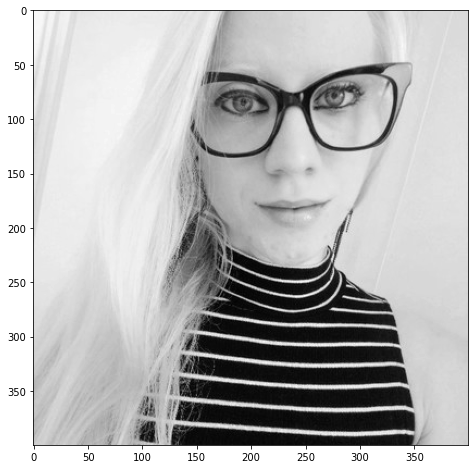

In [4]:
url = "https://media-exp1.licdn.com/dms/image/C4E03AQFn1BQAeVvIZQ/profile-displayphoto-shrink_400_400/0/1556340784739?e=1624492800&v=beta&t=Yln8lQvo7ZHk7kEDC66xJT3sNbbYBbDkgyLEQIFEF98"
image = io.imread(url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 8))
plt.imshow(image, cmap="gray", vmin=0, vmax=255)

In [5]:
def plot_histogram(histogram, edges):
  plt.figure(figsize=[10,8])
  
  plt.bar(edges, histogram, width = 0.8, color='#0504aa')
  plt.xlim(min(edges), max(edges))
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('Value',fontsize=15)
  plt.ylabel('Frequency',fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.ylabel('Frequency',fontsize=15)
  plt.title('Document Image Histogram',fontsize=15)
  plt.show()

Executando função:

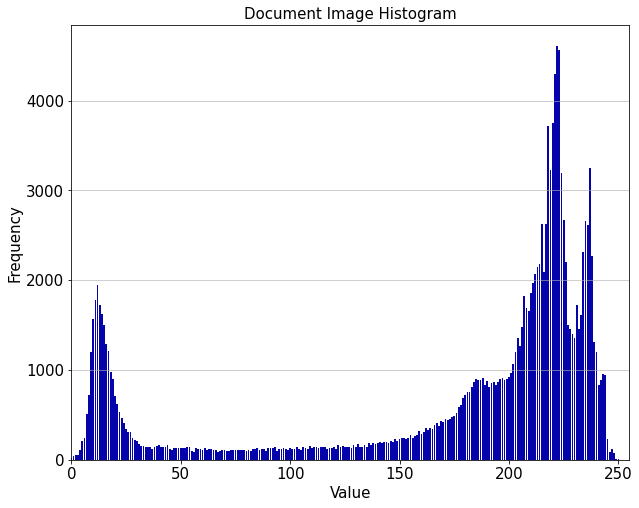

In [6]:
my_histogram, my_edges = histogram(image)

plot_histogram(my_histogram, my_edges)

Vadilando resposta da execução com função numpy:

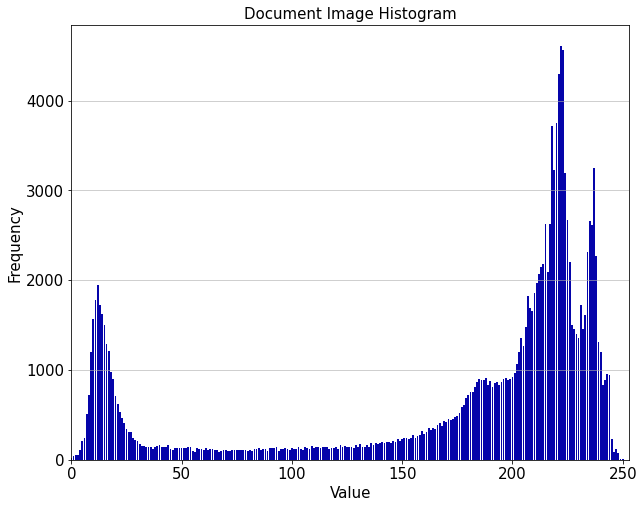

In [7]:
histogram, edges = np.histogram(image, bins=range(255))

plot_histogram(histogram, edges[:-1])

**2 - Implemente um programa (método, procedimento, função) em qualquer
linguagem de programação que receba uma imagem e a exiba com todos os
pixels mais claros ou mais escuros. O nível de clareamento ou escurecimento,
assim como a matriz de pixels, devem ser recebidos como parâmetros.**

In [8]:
from enum import Enum

class Modify(Enum):
  DARKEN = 1
  LIGHTEN = 2

Função para clarear ou escurecer imagem:

In [9]:
def image_modify(image, modify, level):
  new_image = image.copy()
  
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      contrast = image[i][j]

      if modify is Modify.LIGHTEN:
        change = contrast + level
        if change >= 255:
          new_image[i][j] = 255
        else:
          new_image[i][j] = change

      if modify is Modify.DARKEN:
        change = contrast - level
        if change <= 0:
          new_image[i][j] = 0
        else:
          new_image[i][j] = change

  return new_image

Execução da função clareando imagem com aumento 50 no contraste.

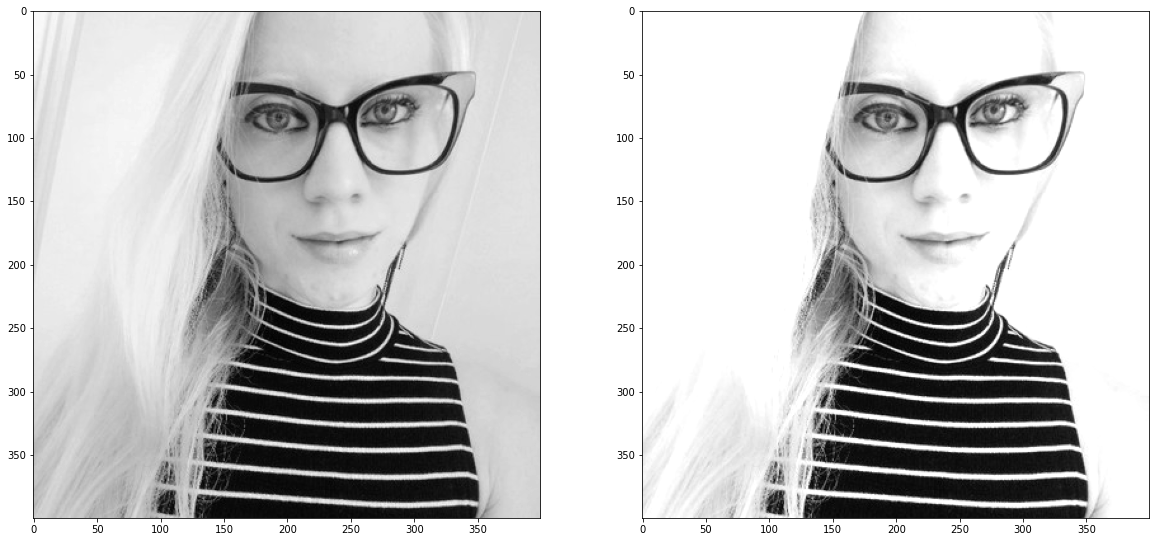

In [36]:
clear_image = image_modify(image, Modify.LIGHTEN, 50)

figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(clear_image, cmap='gray')

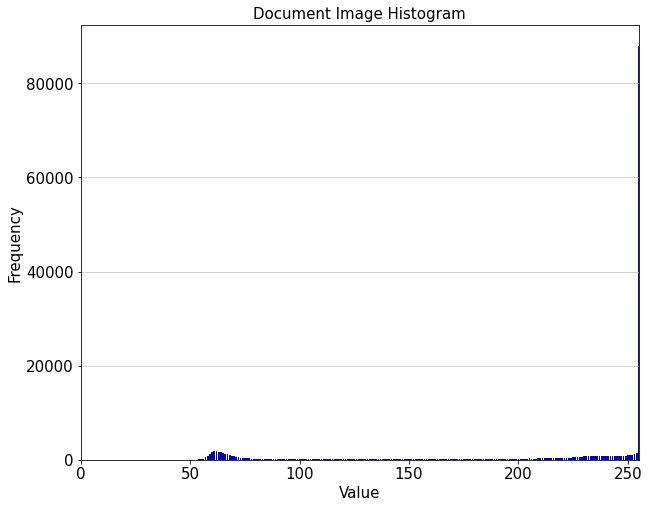

In [17]:
clear_histogram, clear_edges = histogram(clear_image)

plot_histogram(clear_histogram, clear_edges)

Executando função para escurecer imagem:

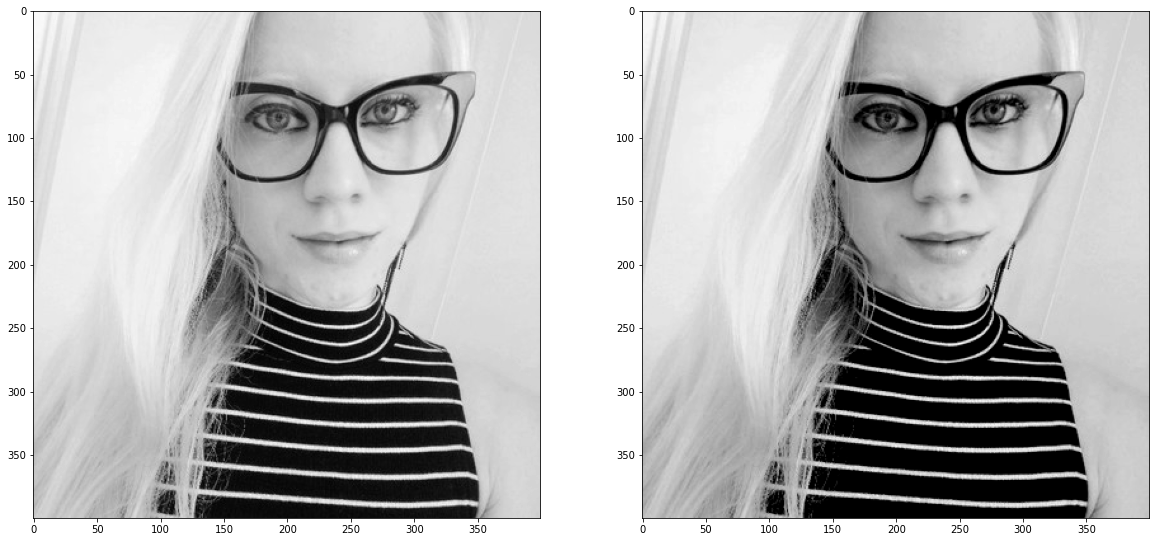

In [35]:
dark_image = image_modify(image, Modify.DARKEN, 50)

figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(image, cmap='gray')
axarr[1].imshow(dark_image, cmap='gray')

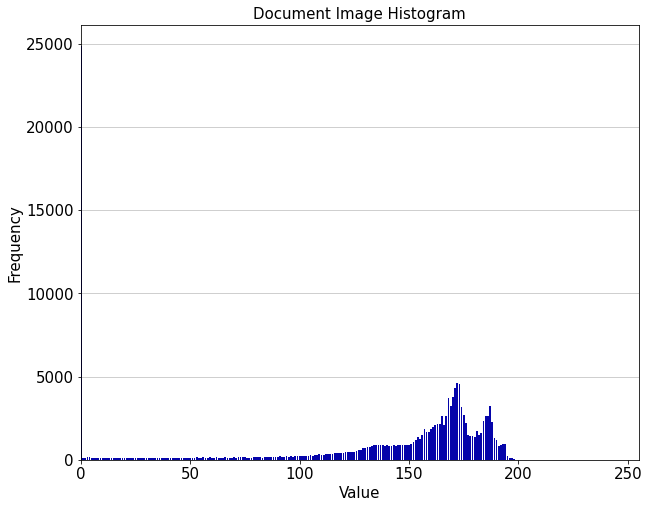

In [19]:
dark_histogram, dark_edges = histogram(dark_image)

plot_histogram(dark_histogram, dark_edges)

No exemplo de clareamento, a taxa de variação foi somada ao valor do contraste original em todos os pixels e é possivel notar um deslocamento no histograma da imagem para a direita. Enquanto que no escurecimento, todos os pixels tiveram seu contraste diminuido, deslocando o histograma para a esquerda.

A função utilizou limites minimos e maximos, de modo que quando os valores são excedidos, os minimos e máximos são utilizados como default e por isso há um acumulo de ocorrencias nestas extremidades.

**3 - Continuar a implementação do programa iniciado no exercício anterior, incluindo
um desses filtros (você escolhe):**

* média
* mediana
* equalização

Filtro escolhido: EQUALIZAÇÃO

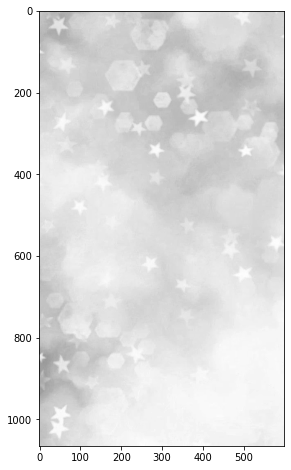

In [38]:
url = "https://www.wallpapertip.com/wmimgs/68-686451_kawaii-pastel-wallpaper-pastel-wallpaper-a4-size.jpg"
image_eq = io.imread(url)
image_eq = cv2.cvtColor(image_eq, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 8))
plt.imshow(image_eq, cmap="gray", vmin=0, vmax=255)

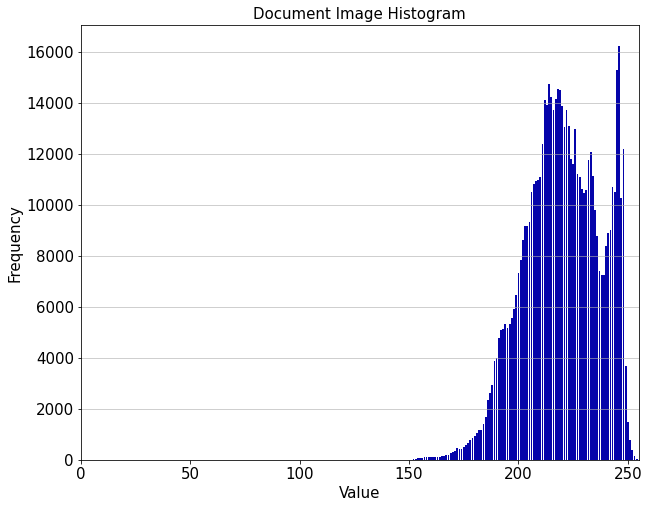

In [49]:
histogram_eq, edges_eq = histogram(image_eq)

plot_histogram(histogram_eq, edges_eq)

In [47]:
def get_hist_proba(hist, n_pixels):
  hist_proba = {}
  for i in range(0, 256):
    hist_proba[str(i)] = hist[i] / n_pixels
    
  return hist_proba

n_pixels = image_eq.shape[0] * image_eq.shape[1]
hist_proba = get_hist_proba(histogram_eq, n_pixels)

In [41]:
def get_accumulated_proba(hist_proba): 
  acc_proba = {}
  sum_proba = 0
    
  for i in range(0, 256):
    if i == 0:
        pass
    else: 
        sum_proba += hist_proba[str(i - 1)]
        
    acc_proba[str(i)] = hist_proba[str(i)] + sum_proba

  return acc_proba

accumulated_proba = get_accumulated_proba(hist_proba)

In [42]:
def get_new_gray_value(acc_proba):
  new_gray_value = {}

  for i in range(0, 256):
      new_gray_value[str(i)] = np.ceil(acc_proba[str(i)] * 255)

  return new_gray_value

new_gray_value = get_new_gray_value(accumulated_proba)

In [43]:
def equalize_hist(img, new_gray_value):
  for row in range(img.shape[0]):
    for column in range(img.shape[1]):
      img[row][column] = new_gray_value[str(int(img[row] [column]))]
          
  return img

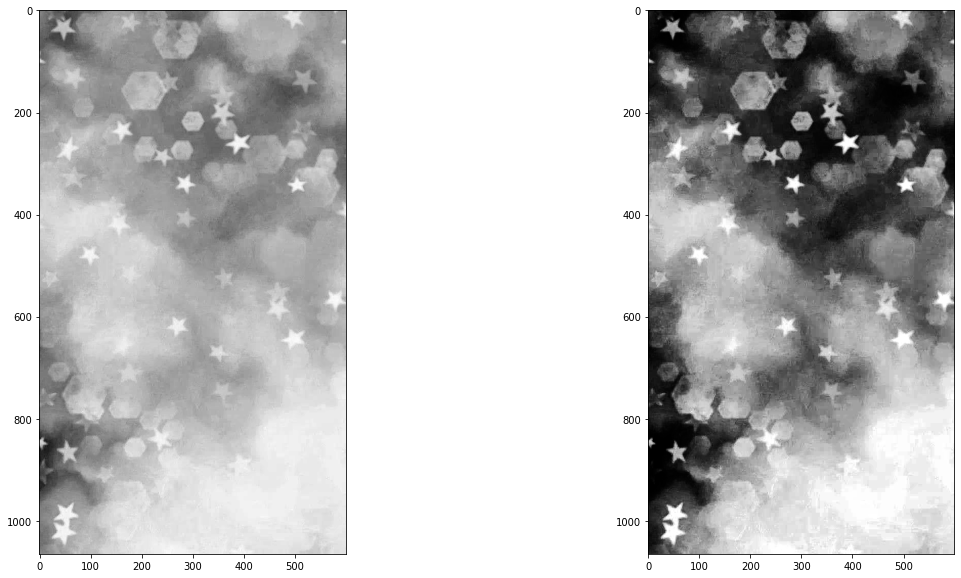

In [44]:
eq_img = equalize_hist(image_eq.copy(), new_gray_value)
figure, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(image_eq, cmap='gray')
axarr[1].imshow(eq_img, cmap='gray')

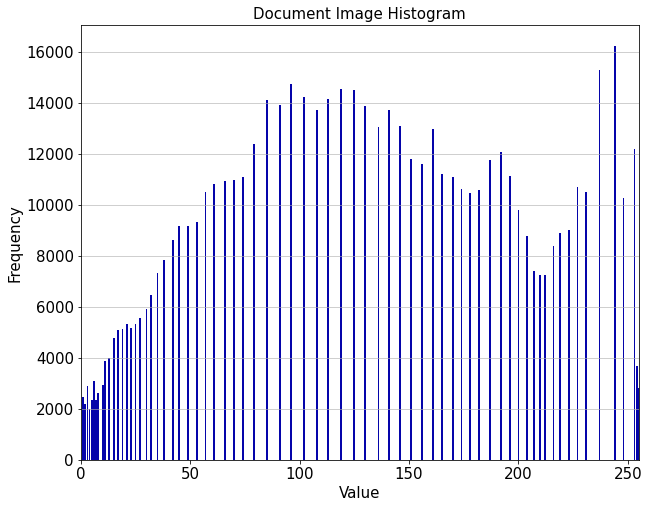

In [50]:
eq_hist, eq_edges = histogram(eq_img)

plot_histogram(eq_hist, eq_edges)

A equalização ela vai distribuir o contraste em toda a imagem de uma forma mais proporcional, a fim de que as diferenças sejam maiores.

Primeiro é calculado o histograma da imagem original, com base neste, calculado do histograma da probabilidade, onde cada valor é dividido pelo numero total de pixels. Depois cada valor do histograma de probabilidade é multiplicado por 255, o valor máximo, para obter a nova distribuição de contraste e aplicar a copia da imagem. 

É possivel ver que o desenho do histograma da imagem equalizada mantem o mesmo contorno porém com valores bem mais distribuidos.